In [1]:
from google.colab import files
uploaded = files.upload()

Saving serie_a_fixtures.csv to serie_a_fixtures (3).csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import io
df2 = pd.read_csv(io.BytesIO(uploaded['serie_a_fixtures.csv']))
import warnings
warnings.filterwarnings("ignore")

In [4]:
df2.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2020-09-19,18:00 (21:30),Fiorentina,1.9,1–0,0.6,Torino,NaN,Stadio Artemio Franchi,Rosario Abisso,Match Report,NaN
1,1.0,Sat,2020-09-19,20:45 (00:15),Hellas Verona,1.3,3–0,1.7,Roma,NaN,Stadio Marc'Antonio Bentegodi,Daniele Chiffi,Match Report,Match awarded to Hellas Verona
2,1.0,Sun,2020-09-20,12:30 (16:00),Parma,0.2,0–2,1.6,Napoli,1000.0,Stadio Ennio Tardini,Maurizio Mariani,Match Report,NaN
3,1.0,Sun,2020-09-20,15:00 (18:30),Genoa,2.0,4–1,1.2,Crotone,NaN,Stadio Comunale Luigi Ferraris,Giovanni Ayroldi,Match Report,NaN
4,1.0,Sun,2020-09-20,18:00 (21:30),Sassuolo,2.3,1–1,1.0,Cagliari,850.0,Stadio Città del Tricolore,Livio Marinelli,Match Report,NaN


In [5]:
df = df2[['Wk', 'Home', 'Away', 'Score']]
df['Score'] = df['Score'].astype('str')
df.dropna(inplace=True)
df.head(10)

,Wk,Home,Away,Score
0,1.0,Fiorentina,Torino,1–0
1,1.0,Hellas Verona,Roma,3–0
2,1.0,Parma,Napoli,0–2
3,1.0,Genoa,Crotone,4–1
4,1.0,Sassuolo,Cagliari,1–1
5,1.0,Juventus,Sampdoria,3–0
6,1.0,Milan,Bologna,2–0
8,2.0,Torino,Atalanta,2–4
9,2.0,Cagliari,Lazio,0–2
10,2.0,Sampdoria,Benevento,2–3


In [6]:
teams = df.Home.unique()
teams = teams.tolist()

In [7]:
week1 = df[df['Wk'] == 1.0]

In [8]:
week1

,Wk,Home,Away,Score
0,1.0,Fiorentina,Torino,1–0
1,1.0,Hellas Verona,Roma,3–0
2,1.0,Parma,Napoli,0–2
3,1.0,Genoa,Crotone,4–1
4,1.0,Sassuolo,Cagliari,1–1
5,1.0,Juventus,Sampdoria,3–0
6,1.0,Milan,Bologna,2–0
19,1.0,Udinese,Spezia,0–2
20,1.0,Benevento,Inter,2–5
21,1.0,Lazio,Atalanta,1–4


In [9]:
table = pd.DataFrame(teams, columns = ['Teams'])
# table = table.drop(labels=['NaN'], axis=0)
# table['Team'] = pd.Series(teams)
table['Points'] = np.zeros(20)
table

,Teams,Points
0,Fiorentina,0.0
1,Hellas Verona,0.0
2,Parma,0.0
3,Genoa,0.0
4,Sassuolo,0.0
5,Juventus,0.0
6,Milan,0.0
7,Torino,0.0
8,Cagliari,0.0
9,Sampdoria,0.0


In [10]:
import numpy as np
def create_results(fixtures):
    helper = fixtures
    helper['Home goals'] = np.nan
    helper['Away goals'] = np.nan
    helper['Result'] = ''
    for index, row in helper.iterrows():
        score = helper.loc[index, 'Score']
        helper.loc[index, 'Home goals'] = score[0]
        helper.loc[index, 'Away goals'] = score[2]
        if helper.loc[index, 'Home goals'] > helper.loc[index, 'Away goals']:
            helper.loc[index, 'Result'] = 'Home'
        elif helper.loc[index, 'Home goals'] < helper.loc[index, 'Away goals']: 
            helper.loc[index, 'Result'] = 'Away'
        else:
            helper.loc[index, 'Result'] = 'Draw'
    # print(helper)
    return helper

def create_table(fixtures, table):
    results = create_results(fixtures)
    for index, row in results.iterrows():
        if row['Result'] == 'Draw':
            table.loc[table['Teams']==row['Home'], 'Points'] += 1
            table.loc[table['Teams']==row['Away'], 'Points'] += 1
            continue
        if row['Result'] == 'Home':
            winner = row['Home']
        elif row['Result'] == 'Away':
            winner = row['Away']
        table.loc[table['Teams']==winner, 'Points'] += 3
    table = table.sort_values(by=['Points'], ascending=False)
    # print(table)
    return table

In [11]:
# gw_table = table

# for i in range(1, 18):
#     gameweek = df[df['Wk'] == i]
#     gw_table = create_table(gameweek, gw_table)
#     print(gw_table)

# week17 = df[df['Wk'] == 18]
# week17

In [12]:
# week2 = df[df['Wk'] == 2]

In [13]:
gw_table = table
data = pd.DataFrame()
data['0'] = sorted(teams)
for i in range(1, 18):
    gameweek = df[df['Wk'] == i]
    gw_table = create_table(gameweek, gw_table)
    data[f'{int(i)}'] = gw_table['Teams'].tolist()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Atalanta,Fiorentina,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan,Milan
1,Benevento,Milan,Napoli,Atalanta,Sassuolo,Napoli,Sassuolo,Napoli,Sassuolo,Napoli,Napoli,Napoli,Inter,Inter,Inter,Inter,Inter,Inter
2,Bologna,Napoli,Hellas Verona,Inter,Napoli,Sassuolo,Napoli,Sassuolo,Roma,Sassuolo,Inter,Inter,Napoli,Napoli,Roma,Roma,Roma,Roma
3,Cagliari,Spezia,Inter,Sassuolo,Atalanta,Inter,Atalanta,Roma,Napoli,Inter,Sassuolo,Sassuolo,Roma,Juventus,Napoli,Napoli,Juventus,Juventus
4,Crotone,Hellas Verona,Atalanta,Napoli,Inter,Atalanta,Inter,Atalanta,Inter,Roma,Roma,Roma,Sassuolo,Roma,Sassuolo,Juventus,Napoli,Napoli
5,Fiorentina,Inter,Sassuolo,Hellas Verona,Hellas Verona,Sampdoria,Hellas Verona,Inter,Atalanta,Juventus,Juventus,Juventus,Juventus,Sassuolo,Juventus,Sassuolo,Sassuolo,Atalanta
6,Genoa,Juventus,Juventus,Benevento,Roma,Hellas Verona,Roma,Hellas Verona,Juventus,Hellas Verona,Lazio,Hellas Verona,Hellas Verona,Atalanta,Atalanta,Atalanta,Atalanta,Sassuolo
7,Hellas Verona,Genoa,Benevento,Juventus,Benevento,Roma,Juventus,Juventus,Lazio,Atalanta,Hellas Verona,Atalanta,Atalanta,Lazio,Lazio,Hellas Verona,Lazio,Lazio
8,Inter,Atalanta,Bologna,Roma,Juventus,Fiorentina,Lazio,Lazio,Hellas Verona,Lazio,Atalanta,Lazio,Lazio,Hellas Verona,Hellas Verona,Lazio,Hellas Verona,Hellas Verona
9,Juventus,Cagliari,Fiorentina,Lazio,Sampdoria,Cagliari,Sampdoria,Cagliari,Sampdoria,Bologna,Cagliari,Udinese,Udinese,Sampdoria,Benevento,Benevento,Benevento,Benevento


In [14]:
from glob import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rc

from typing import Tuple, Union

In [15]:
Path = mpath.Path

def get_patch(p1: Tuple, p2: Tuple, color: Union[str, Tuple]):
    """ Returns a patch of bezier curve from one point to another
    We have 3 cases to consider depending on the x coordinate of the 2 points - p1, p2:
    1. When next point (p2) > previous point (p1)
    2. When p2 < p1
    3. When p2 == p1
    
    Depending on the case, we draw a bezier curve from the coressponding control points and then return that patch
    
    Args: 
        - p1, p2 (tuples): 2 tuples of x,y points  
        - color (str/rgba tuple): color of line 
    Returns:
        - patch (instance of mpl patch)
    """

    x1, y1 = p1; x2, y2 = p2
    
    if y2 > y1:
        patch = mpatches.PathPatch(
            Path(
                 [p1, (x1+(x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1+(x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    elif y2 < y1:
        patch = mpatches.PathPatch(
            Path([p1, (x1 + (x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1 + (x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    else:
        patch = mpatches.PathPatch(
            Path([p1, p2],
                 [Path.MOVETO, Path.LINETO]), ec=color, fc='none', zorder=5)

    return patch

def imscatter(x, y, image, ax=None, zoom=1):
    """ Function to plot the team crests (stackoverflow.com/questions/35651932/plotting-img-with-matplotlib/35651933)"""
    
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [16]:
teams = data['0'].values
print(teams)
colors = ['#FF0000',
'#85001B',
'#0055A9',
'#81001A',
'#0000BE',
'#1B458F',
'#0078EF',
'k',
'#FFCD00',
'#0023CB',
'#DE0000',
'#98C5E9',
'#DA020E',
'#241F20',
'#EE2737',
'#ED1A3B',
'#001C58',
'#122F67',
'#60223B',
'#FDB913']

images = [
    '/content/drive/MyDrive/seria a images/Atalanta.png',
    '/content/drive/MyDrive/seria a images/Benevento.png',
    '/content/drive/MyDrive/seria a images/Bologna.png',
    '/content/drive/MyDrive/seria a images/Cagliary.png',
    '/content/drive/MyDrive/seria a images/Crotone.png',
    '/content/drive/MyDrive/seria a images/Fiorentina.png',
    '/content/drive/MyDrive/seria a images/Genoa.png',
    '/content/drive/MyDrive/seria a images/Verona.png',
    '/content/drive/MyDrive/seria a images/Inter.png',
    '/content/drive/MyDrive/seria a images/Juventus.png',
    '/content/drive/MyDrive/seria a images/Lazio.png',
    '/content/drive/MyDrive/seria a images/Milan.png',
    '/content/drive/MyDrive/seria a images/Napoli.png',
    '/content/drive/MyDrive/seria a images/Parma.png',
    '/content/drive/MyDrive/seria a images/Roma.png',
    '/content/drive/MyDrive/seria a images/Sampdoria.png',
    '/content/drive/MyDrive/seria a images/Sassuolo.png',
    '/content/drive/MyDrive/seria a images/Spezia.png',
    '/content/drive/MyDrive/seria a images/Torino.png',
    '/content/drive/MyDrive/seria a images/Udinese.png'
]

['Atalanta' 'Benevento' 'Bologna' 'Cagliari' 'Crotone' 'Fiorentina'
 'Genoa' 'Hellas Verona' 'Inter' 'Juventus' 'Lazio' 'Milan' 'Napoli'
 'Parma' 'Roma' 'Sampdoria' 'Sassuolo' 'Spezia' 'Torino' 'Udinese']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


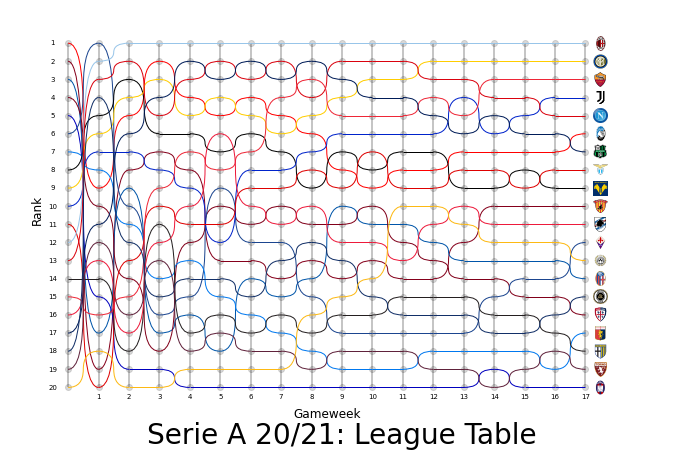

In [17]:
rc('font',**{'family':'sans-serif','sans-serif':['Goldman Sans']})    

fig, ax = plt.subplots(figsize=(12,8))

for team_name, color, img_path in zip(teams, colors, images):
    indices = data[data == team_name].stack().index.tolist()
    coords = [(idx[1], idx[0]) for idx in indices]
    coords = [(int(coord[0]), coord[1]) for coord in coords]
    coords = sorted(coords, key=lambda x: x[0])

    ###
    for p1, p2 in zip(coords[:-1], coords[1:]):
        patch = get_patch(p1, p2, color)
        ax.add_patch(patch)
    
    imscatter(x=17.5, y=coords[-1][-1], image = img_path, ax=ax, zoom=0.5)
    
ax.set_axis_off()
ax.set(xlim=(-2,20), ylim=(-2,22))
ax.title.set(text='Serie A 20/21: League Table', x=.5, y=0, ha='center', va='center', fontweight='light', fontsize=28)
ax.text(8.5, 20.5, 'Gameweek', fontsize=12, va='center', ha='center')
ax.text(-1, 10, 'Rank', rotation=90, fontsize=12, va='bottom', ha='center')
[ax.text(i, 19.5, i, ha='center', va='center', size=7) for i in range(1, 18)]
[ax.text(-0.5, i, i+1, ha='center', va='center', size=7) for i in range(20)]    
for i in range(18):
    for j in range(20):
        ax.scatter(i, j, fc='0.5', alpha=.3, zorder=1)
ax.vlines(x=list(range(18)), ymin=0, ymax=19, fc='0.5', alpha=.3, zorder=1)        
ax.invert_yaxis()

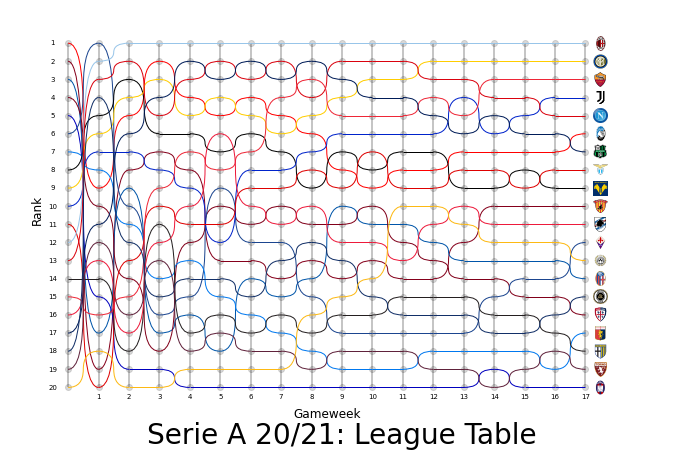

In [18]:
fig

In [19]:
fig.savefig('final.png', dpi=180)